# Exploratory Analysis

In [1]:
filepath = 'C:/Users/Tim/Desktop/lighthouse/w11,12 - final project/'
data_filepath = filepath + 'data/'
final_data = 'final_df.csv'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [2]:
df = pd.read_csv(data_filepath + final_data)

In [3]:
def info(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    dtype = x.dtypes
    count = x.count()
    missing_ = pd.concat([n_missing, p_missing, dtype, count],axis=1, keys = [
        'number_missing',
        'percent_missing',
        'type',
        'count'
    ])
    return missing_

In [4]:
info(df)

,number_missing,percent_missing,type,count
player,0,0.0,object,28297
date,0,0.0,object,28297
perf_resid,0,0.0,float64,28297
w_performance,0,0.0,float64,28297
rank_weight,0,0.0,float64,28297
rank_differential,0,0.0,int64,28297
performance,0,0.0,float64,28297
n_impact,0,0.0,float64,28297
kpr,0,0.0,float64,28297
kdr,0,0.0,float64,28297


In [29]:
df.head()

,player,date,team,team_rounds,opposing_team,opposing_team_rounds,map,kills,deaths,differential,...,team_rank,kdr,kpr,n_impact,performance,rank_differential,rank_weight,w_performance,perf_resid,perf_resid_lag
0,s1mple,2020-02-29,Natus Vincere,16,Astralis,5,nuke,18,11,7,...,6,1.636364,0.857143,0.330758,1.850758,-5,1.5,2.776137,1.256137,1.256137
1,s1mple,2020-02-29,Natus Vincere,16,Astralis,5,d2,25,11,14,...,6,2.272727,1.190476,0.330758,2.420758,-5,1.5,3.631137,1.541137,1.256137
2,electronic,2020-02-29,Natus Vincere,16,Astralis,5,nuke,22,5,17,...,6,4.400000,1.047619,0.165008,2.025008,-5,1.5,3.037512,1.177512,1.177512
3,electronic,2020-02-29,Natus Vincere,16,Astralis,5,d2,15,11,4,...,6,1.363636,0.714286,0.165008,1.325008,-5,1.5,1.987512,0.827512,1.177512
4,flamie,2020-02-29,Natus Vincere,16,Astralis,5,nuke,23,10,13,...,6,2.300000,1.095238,-0.036592,1.753408,-5,1.5,2.630112,0.840112,0.840112


In [6]:
df['date'] = pd.to_datetime(df.date)

new_df = df.groupby(['team','opposing_team'])

<AxesSubplot:xlabel='target', ylabel='rank_differential'>

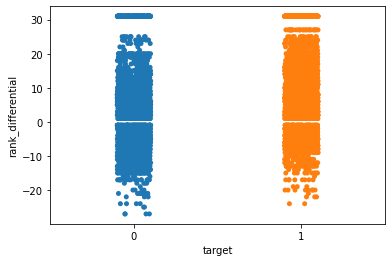

In [13]:
sns.stripplot(x='target', y='rank_differential', data=df[df['date']>'2019-01-01'])

<AxesSubplot:xlabel='rank_differential', ylabel='team'>

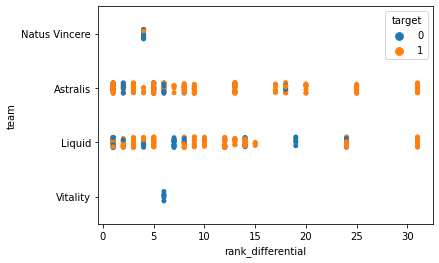

In [26]:
sns.stripplot(y='team', x='rank_differential',hue='target', data=df[(df['date']>'2019-01-01')&(df['team_rank']==1)])

<AxesSubplot:xlabel='date', ylabel='performance'>

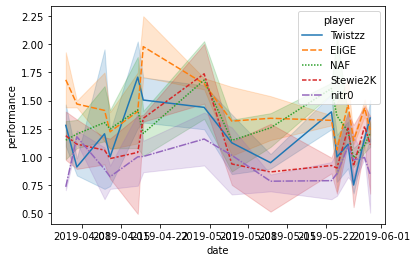

In [36]:
sns.lineplot(y = 'performance', x = 'date', hue = 'player', style='player', data=df[(df['team'].str.contains('Liquid'))&(df['date']>'2019-01-01')&(df['date']<'2019-06-01')])

<AxesSubplot:xlabel='date', ylabel='performance'>

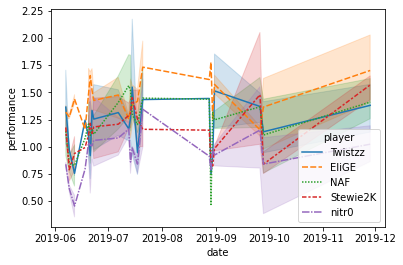

In [37]:
sns.lineplot(y = 'performance', x = 'date', hue = 'player', style='player', data=df[(df['team'].str.contains('Liquid'))&(df['date']>'2019-06-01')&(df['date']<'2019-12-01')])